In [1]:
from pathlib import Path
import json

coco_path = Path('/misc/vlgscratch5/LakeGroup/shared_data/coco')

with open(coco_path / 'karpathy_caption_datasets' / 'dataset_coco.json') as f:
    data = json.load(f)

In [2]:
split = ['train', 'restval', 'val', 'test'][-1]

images = data['images']
images = list(filter(lambda image: image['split'] == split, images))

In [32]:
def get_image_filename(filename):
    return filename[-16:]


def get_image_filename_from_image(image):
    return get_image_filename(image['filename'])


def get_image_path(filename):
    return coco_path / 'all_images' / filename


token = input('search token: ').strip()
found_images = []
for image in images:
    found = False
    for sentence in image['sentences']:
        if token in sentence['tokens']:
            found = True
            break
    if found:
        print(f'#{len(found_images)} ({get_image_path(get_image_filename_from_image(image))}):')
        for sentence in image['sentences']:
            print(sentence['raw'])
        found_images.append(image)

search token: motorcycle
#0 (/misc/vlgscratch5/LakeGroup/shared_data/coco/all_images/000000391895.jpg):
A man with a red helmet on a small moped on a dirt road. 
Man riding a motor bike on a dirt road on the countryside.
A man riding on the back of a motorcycle.
A dirt path with a young person on a motor bike rests to the foreground of a verdant area with a bridge and a background of cloud-wreathed mountains. 
A man in a red shirt and a red hat is on a motorcycle on a hill side.
#1 (/misc/vlgscratch5/LakeGroup/shared_data/coco/all_images/000000559665.jpg):
Black and white photograph of two men on motorcycles.
Two people riding a motorcycle with hats and backpack down a street.
Two men are at an intersection on motorcycles.
The man are driving side by side on their motorcycles. 
Two men on motorcycles at a stop light
#2 (/misc/vlgscratch5/LakeGroup/shared_data/coco/all_images/000000550529.jpg):
A motorbike sitting in front of a wine display case
A motor bike and some wine in a room.
A d

/misc/vlgscratch4/LakeGroup/wentao/a-PyTorch-Tutorial-to-Image-Captioning/caption.py:171: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image = image.resize((size[1], size[0]), Image.LANCZOS)


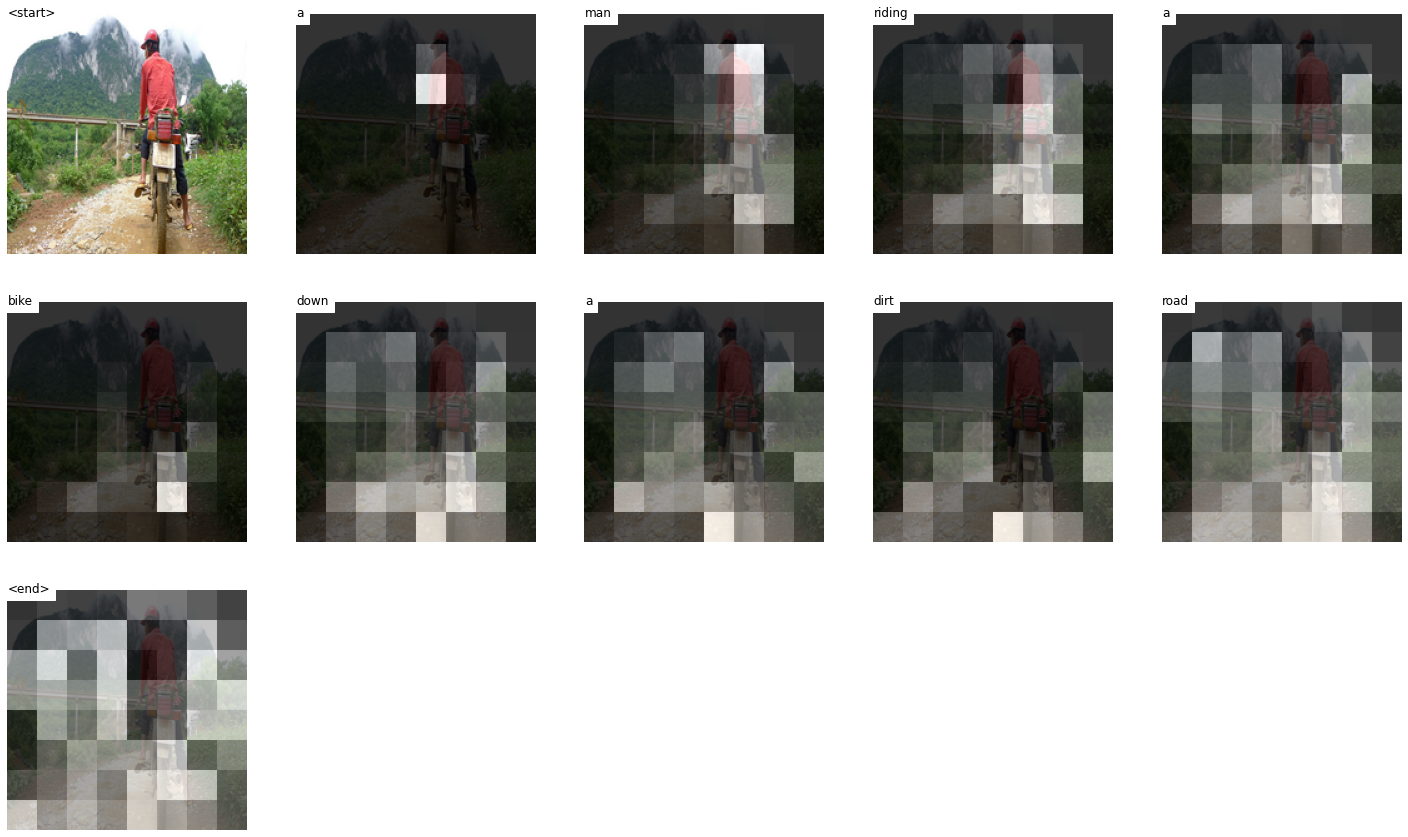

In [33]:
%run caption.py --img {get_image_path(get_image_filename_from_image(found_images[0]))} --dont_smooth